# Kaggle  sentiment analysis on movie reviews

Tian Xin  2022-10-16


Basic knowledge of natural language processing and text data mining, such as data preprocessing, word removal, bag of words model, TF-IDF model, and basic knowledge of machine learning, such as data set splitting, logistic regression model, hyperparameter grid search, cross validation, model effect evaluation, etc



# Introduction to Data Set

Kaggle website：
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


# Importing  dataset

In [1]:
import pandas as pd

In [2]:
# tsv format data is separated by tabs \t,
data_train = pd.read_csv('./train.tsv',sep='\t')
data_test = pd.read_csv('./test.tsv',sep='\t')

In [3]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


The emotional label of film criticism

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

In [4]:
data_train.shape

(156060, 4)

In [5]:
data_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [6]:
data_test.shape

(66292, 3)

# features engineering

In [7]:
#Extract the text content in the training set
train_sentences = data_train['Phrase']
#Extract the text content in the test set
test_sentences = data_test['Phrase']
#The pandas concat function is used to merge the text content of the training and test sets
sentences = pd.concat([train_sentences,test_sentences])

In [8]:
#The combined corpus consists of 222,352 lines of data
sentences.shape

(222352,)

In [9]:
# The sentiment labels in the training set are extracted
label = data_train['Sentiment']

In [10]:
#Extract the emotion labels in the training set, a total of 156,060 labels
label.shape

(156060,)

In [11]:
#Import stop words, stop words are some nonsense words and modal words, nothing to help sentiment analysis
stop_words = open('./stop_words.txt',encoding='utf-8').read().splitlines()

In [12]:
stop_words

["\ufeffain'",
 'happy',
 'isn',
 'ain',
 'al',
 'couldn',
 'didn',
 'doesn',
 'hadn',
 'hasn',
 'haven',
 'sn',
 'll',
 'mon',
 'shouldn',
 've',
 'wasn',
 'weren',
 'won',
 'wouldn',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'t",
 "'ve",
 'ZT',
 'ZZ',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'are',
 'area',
 'areas',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asked',
 'asking',
 

# TF-IDF Model
## term frequency–inverse document frequency
If a word or phrase has a high frequency TF in one article and rarely appears in other articles, it is considered that the word or phrase has good category discrimination ability and is suitable for classification

In [13]:
#tf-(term frequency),idf-(inverse document frequenct)
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,3),
    stop_words=stop_words,
    max_features=200000
)

In [14]:
tf.fit(sentences)

TfidfVectorizer(max_features=200000, ngram_range=(1, 3),
                stop_words=["\ufeffain'", 'happy', 'isn', 'ain', 'al', 'couldn',
                            'didn', 'doesn', 'hadn', 'hasn', 'haven', 'sn',
                            'll', 'mon', 'shouldn', 've', 'wasn', 'weren',
                            'won', 'wouldn', "'d", "'ll", "'m", "'re", "'s",
                            "'t", "'ve", 'ZT', 'ZZ', 'a', ...])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_sentences,label,random_state=1234)

In [16]:
x_train = tf.transform(x_train)
x_test = tf.transform(x_test)

##  MultinomialNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)
print('MultinomialNB classifier, prediction accuracy:',classifier.score(x_test,y_test))

MultinomialNB classifier, prediction accuracy: 0.5985390234525183


In [18]:
import warnings 
warnings.filterwarnings('ignore')

## LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
lg_default = LogisticRegression(max_iter=1000)
lg_default.fit(x_train,y_train)
print('LogisticRegressio classifier, prediction accuracy:',lg_default.score(x_test,y_test))

LogisticRegressio classifier, prediction accuracy: 0.6247084454696912


In [20]:
# C：The smaller the regularization coefficient, C, the stronger the regularization effect
lg_tuning = LogisticRegression(C=2.0)
lg_tuning.fit(x_train,y_train)
print('LogisticRegressio classifier with hiper-parameter c=3.0, prediction accuracy:',lg_tuning.score(x_test,y_test))

LogisticRegressio classifier with hiper-parameter c=3.0, prediction accuracy: 0.6298603101371267


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':range(1,3)
              }
lgGS = LogisticRegression()
grid = GridSearchCV(lgGS, param_grid=param_grid,cv=2,n_jobs=1)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': range(1, 3)})

In [22]:
grid.best_params_

{'C': 2}

In [23]:
lg_best = grid.best_estimator_

[[  392   841   486    25     0]
 [  291  2665  3637   220     4]
 [   57  1230 17195  1387    51]
 [    6   139  4006  3744   338]
 [    0    11   500  1212   578]]


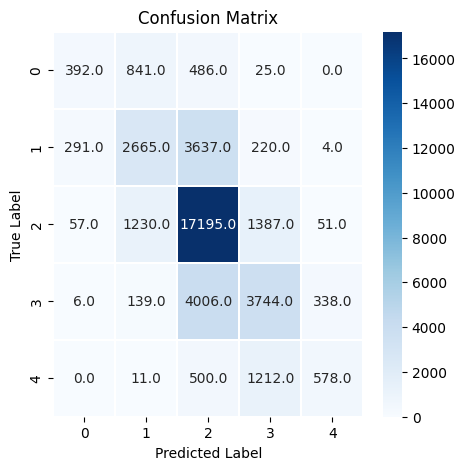

In [24]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
y_pred=lg_best.predict(x_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
print(confusion_mtx)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
print('the optimal hyperparameter combination is found, prediction accuracy :',lg_best.score(x_test,y_test))

the optimal hyperparameter combination is found, prediction accuracy : 0.6298603101371267


# Make predictions on the test set and submit the Kaggle competition results

In [26]:
data_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [27]:
test_X = tf.transform(data_test['Phrase'])

In [28]:
predictions = lg_best.predict(test_X)

In [29]:
predictions.shape

(66292,)

In [30]:
# Add the predictions to the test set
data_test.loc[:,'Sentiment'] = predictions

In [31]:
data_test.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine ...,2
1,156062,8545,An intermittently pleasing but mostly routine ...,2
2,156063,8545,An,2
3,156064,8545,intermittently pleasing but mostly routine effort,2
4,156065,8545,intermittently pleasing but mostly routine,3


In [32]:
# This is the format required by the Kaggle competition website
best_data = data_test.loc[:,['PhraseId','Sentiment']]

In [33]:
best_data .head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,3


In [35]:
# The final result is saved as a.csv file

best_data.to_csv('best_data.csv',index=None)